In [107]:
import scripts.functionality as funcs
from scripts.graph import Graph
import pandas as pd
from collections import defaultdict

In [2]:
%load_ext autoreload
%autoreload 2

In [57]:
link_dict = funcs.read_graph()
link_dict = defaultdict(set, link_dict)

##### Read Data and save to json

In [4]:
pages_category = funcs.read_pages_category(filename='data/wiki-topcats-categories.txt')
funcs.write_json('data/page_category.json', pages_category)

In [5]:
name_page = funcs.read_name_page(filename='data/wiki-topcats-page-names.txt')
funcs.write_json('data/name_page.json', name_page)

##### Read data from json

In [6]:
# pages_category: Key is the category, and value is a list of integers which is associated to a set of articles
# name_page: Key is an integer that identifies the article. The value associated is the name of the article

pages_category = funcs.read_json('data/page_category.json')
name_page = funcs.read_json_int_key('data/name_page.json')

##### Understanding the data

- Edge_ID seems to be unique. This is the main reason for which we think it is the unique edge identifier
- From pages_category we have a set of category names (e.g. Members_of_the_Parliament_of_Great_Britain_for_Scottish_constituencies). These are the keys of the dictionary.
- The values in each of these keys are the pages contained in this category (e.g. '34683')
- The actual name of this page can be found in the dictionary name_page (the result seems to be a page somewhat related to that specific category)

In [7]:
# Find articles assigned to multiple categories
article_category = funcs.revert_dict_list(pages_category)

In [8]:
# Randomly pick one category for each article
unique_category = funcs.uniformly_pick_article_category(article_category)

In [9]:
# Revert back from articles to categories
final_pages_category = funcs.revert_dict(unique_category)
funcs.write_json('data/final_pages_category.json', final_pages_category)

##### Initialize Graph  Class

In [108]:
graph = Graph()

## Question2 ~ Pages reached in given number of clicks

In [22]:
pages_seen = funcs.pages_in_clicks(link_dict, 95, 2)

In [23]:
len(pages_seen)

7

In [24]:
link_dict[1185516]

[150451, 1062563, 1178930, 1184017, 1184695, 1761109]

In [38]:
link_df = funcs.read_graph(output='df')

In [28]:
from scripts.graph import Graph

In [61]:
test_graph = Graph()

In [32]:
test_graph.edges

defaultdict(set, {})

In [62]:
for index, row in link_df.head(50).iterrows():
    test_graph.add_edge(row[0], row[1])
#test_graph.add_edge()

In [46]:
test_graph.edges

set()

In [47]:
import matplotlib.pyplot as plt

In [48]:
import networkx as nx

<Figure size 432x288 with 0 Axes>

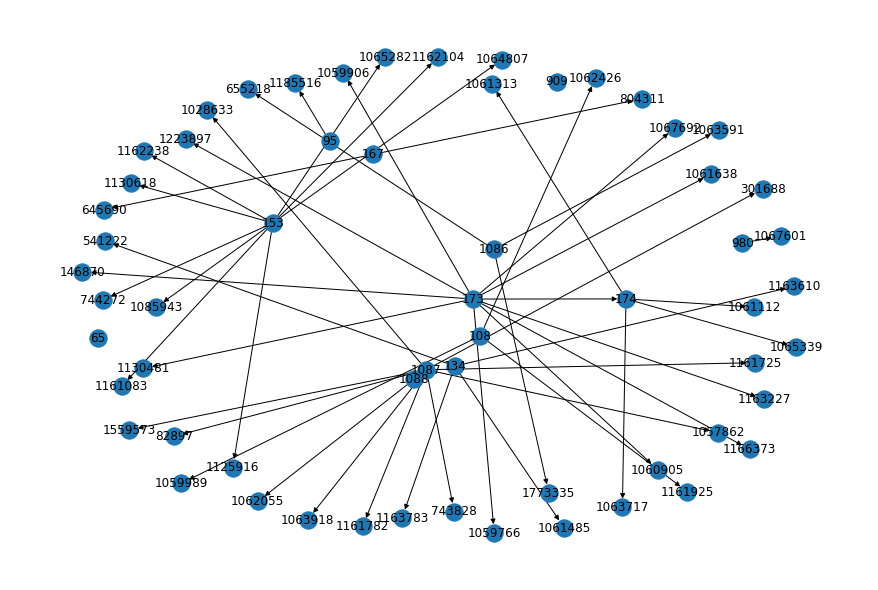

In [77]:
plt.clf()
plt.figure(figsize=(12,8))
nx.draw(g, with_labels=True)
plt.show()

In [50]:
g = nx.DiGraph(test_graph.edges)

In [55]:
link_dict

defaultdict(set,
            {95: [1185516],
             108: [1059989, 1062426, 1161925],
             134: [541222, 1061485, 1163610, 1163783],
             153: [744272,
              1064807,
              1065282,
              1085943,
              1125916,
              1130618,
              1161083,
              1162104,
              1162238],
             167: [645690, 804311],
             173: [174,
              146870,
              1059766,
              1059906,
              1060905,
              1061638,
              1067692,
              1130481,
              1163227,
              1166373,
              1223897],
             174: [1061112, 1061313, 1063717, 1065339],
             980: [1067601],
             1086: [655218, 1063591, 1773335],
             1087: [1088,
              82897,
              301688,
              743828,
              1028633,
              1057862,
              1062055,
              1063918,
              1161725,
             

In [75]:
test_graph.edges

defaultdict(set,
            {95: {1185516},
             108: {1059989, 1062426, 1161925},
             134: {541222, 1061485, 1163610, 1163783},
             153: {744272,
              1064807,
              1065282,
              1085943,
              1125916,
              1130618,
              1161083,
              1162104,
              1162238},
             167: {645690, 804311},
             173: {174,
              146870,
              1059766,
              1059906,
              1060905,
              1061638,
              1067692,
              1130481,
              1163227,
              1166373,
              1223897},
             174: {1061112, 1061313, 1063717, 1065339},
             980: {1067601},
             1086: {655218, 1063591, 1773335},
             1087: {1088,
              82897,
              301688,
              743828,
              1028633,
              1057862,
              1062055,
              1063918,
              1161725,
             

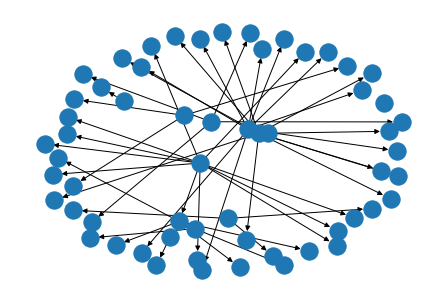

In [76]:
test_graph.plot_graph(False)

In [68]:
test_graph.density_

0.455

In [69]:
test_graph.get_vertices()

[95, 108, 134, 153, 167, 173, 174, 980, 1086, 1087, 1088]

In [70]:
test_graph.get_edges()

[(95, 1185516),
 (108, 1161925),
 (108, 1062426),
 (108, 1059989),
 (134, 1163610),
 (134, 1061485),
 (134, 541222),
 (134, 1163783),
 (153, 1065282),
 (153, 1064807),
 (153, 744272),
 (153, 1085943),
 (153, 1162104),
 (153, 1130618),
 (153, 1161083),
 (153, 1125916),
 (153, 1162238),
 (167, 645690),
 (167, 804311),
 (173, 1059906),
 (173, 1166373),
 (173, 1061638),
 (173, 1060905),
 (173, 1067692),
 (173, 174),
 (173, 1130481),
 (173, 146870),
 (173, 1059766),
 (173, 1223897),
 (173, 1163227),
 (174, 1061112),
 (174, 1061313),
 (174, 1065339),
 (174, 1063717),
 (980, 1067601),
 (1086, 655218),
 (1086, 1773335),
 (1086, 1063591),
 (1087, 1088),
 (1087, 1057862),
 (1087, 1062055),
 (1087, 1063918),
 (1087, 82897),
 (1087, 743828),
 (1087, 1559573),
 (1087, 1161782),
 (1087, 301688),
 (1087, 1028633),
 (1087, 1161725),
 (1088, 1087)]

In [71]:
test_graph.add_vertex(999)

In [74]:
test_graph.__repr__()

'[(95, 1185516), (108, 1161925), (108, 1062426), (108, 1059989), (134, 1163610), (134, 1061485), (134, 541222), (134, 1163783), (153, 1065282), (153, 1064807), (153, 744272), (153, 1085943), (153, 1162104), (153, 1130618), (153, 1161083), (153, 1125916), (153, 1162238), (167, 645690), (167, 804311), (173, 1059906), (173, 1166373), (173, 1061638), (173, 1060905), (173, 1067692), (173, 174), (173, 1130481), (173, 146870), (173, 1059766), (173, 1223897), (173, 1163227), (174, 1061112), (174, 1061313), (174, 1065339), (174, 1063717), (980, 1067601), (1086, 655218), (1086, 1773335), (1086, 1063591), (1087, 1088), (1087, 1057862), (1087, 1062055), (1087, 1063918), (1087, 82897), (1087, 743828), (1087, 1559573), (1087, 1161782), (1087, 301688), (1087, 1028633), (1087, 1161725), (1088, 1087)]'

In [84]:
test_graph.edges[95]

{1185516}

In [85]:
new_queue = set()

In [86]:
new_queue.add(test_graph.edges[95])

TypeError: unhashable type: 'set'

In [87]:
type(test_graph.edges[95])

set

In [89]:
new_queue.update(test_graph.edges[95])

In [90]:
new_queue

{1185516}

In [91]:
initial_page = 95

In [93]:
pages_seen = set()
queue = set([initial_page])

In [94]:
pages_seen

set()

In [95]:
queue

{95}

In [ ]:
new_queue = set()
# List of elements that don't have any out-node
last_nodes = set()

for node in queue:
    if self.

In [96]:
pages_seen

set()

In [97]:
bool(pages_seen)

False

In [98]:
bool(queue)

True

In [106]:
test_graph.pages_in_click(173, 3, print_=True)

173
{1059906, 1166373, 1061638, 1060905, 1067692, 174, 1130481, 146870, 1059766, 1223897, 1163227}
1059906
1166373
1061638
1060905
1067692
174
1130481
146870
1059766
1223897
1163227
{1061112, 1061313, 1065339, 1063717}
1061112
1061313
1065339
1063717
set()


{174,
 146870,
 1059766,
 1059906,
 1060905,
 1061112,
 1061313,
 1061638,
 1063717,
 1065339,
 1067692,
 1130481,
 1163227,
 1166373,
 1223897}

In [101]:
last_node = set()

In [103]:
last_node.update([180])

In [104]:
last_node

{180}